In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from NVAR1 import *

In [6]:
# Function for reading a file
os.getcwd()
weights_path = os.path.join(os.getcwd(), "results", "model_weights")
df = pd.read_csv(os.path.join(weights_path, "NProtocol_17_weights.csv"), header=0, dtype="float64", delimiter=",")
df

,Measured,Integrated,Difference
0,-0.000329,-0.483701,-0.483372
1,0.003077,-0.672210,-0.669133
2,-0.391220,0.214563,0.176657
3,-0.003302,0.746239,-0.742937
4,1.389095,-0.082628,1.306467
5,0.023276,18.089077,-18.065801
6,0.029509,1.102311,-1.072802
7,-0.050071,-35.520173,-35.470102
8,-0.054617,-1.445949,-1.391332
9,0.235743,-0.488021,-0.252278


In [13]:
# Importing the data for running experiments:
data_dict = os.path.join(os.path.dirname(os.getcwd()), "data", "Normalised_Signals")

data_file = os.path.join(data_dict, "M_NProtocol_17")
signal = pd.read_csv(data_file, header=0, delimiter=",", dtype="float").values

# Declaring some of the data dimensions:
TRAIN = 25000
TEST = 50000
HORIZON = 1

# We only need the test data in this instance, as we have saved the weights of the model already.
x_test = signal[TRAIN:TRAIN+TEST, :]
print(x_test.shape)
y_test = signal[TRAIN+HORIZON:TRAIN+TEST+HORIZON, -1].reshape(-1, 1)
print(y_test.shape)

(50000, 2)
(50000, 1)


In [47]:
# We can now manually change some of the values in this list to see how they affect the predictions made by the NVAR.
weights = df.iloc[:, 0].values

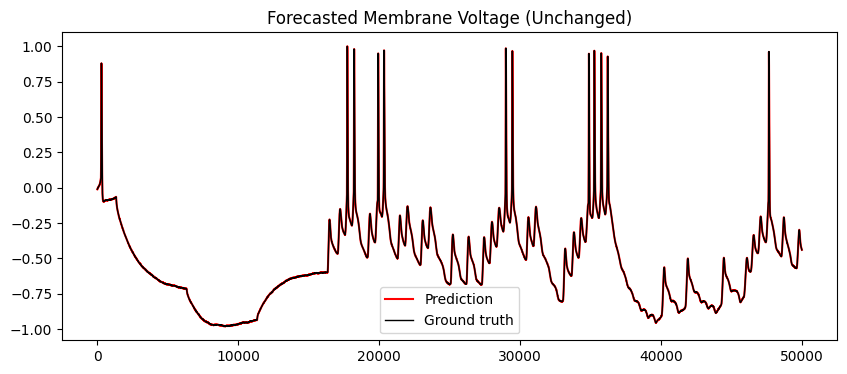

In [48]:
# Implementing the NVAR, applying the weights and plotting to see the effects.
weights = [-3.28868299e-04,  3.07653809e-03, -3.91220203e-01, -3.30213589e-03, 1.38909544e+00,
           2.32761984e-02,  2.95090733e-02, -5.00705628e-02, -5.46168002e-02,  2.35743251e-01,
           -7.21082797e-02, -3.10163759e-01, 2.58718185e-02,  9.93787925e-02,  7.07895897e-02]

nvar = NVAR(delay=2, strides = 3, order=2)
nvar.readout = np.array(weights).reshape(1, -1)
y_pred = nvar.predict(X_test=x_test)
plt.figure(figsize=(10, 4))
plt.plot(y_pred, color="r", lw=1.5, label="Prediction")
plt.plot(y_test, color="k", lw=1.0, label="Ground truth")
plt.title(f"Forecasted Membrane Voltage (Unchanged)")
plt.legend()

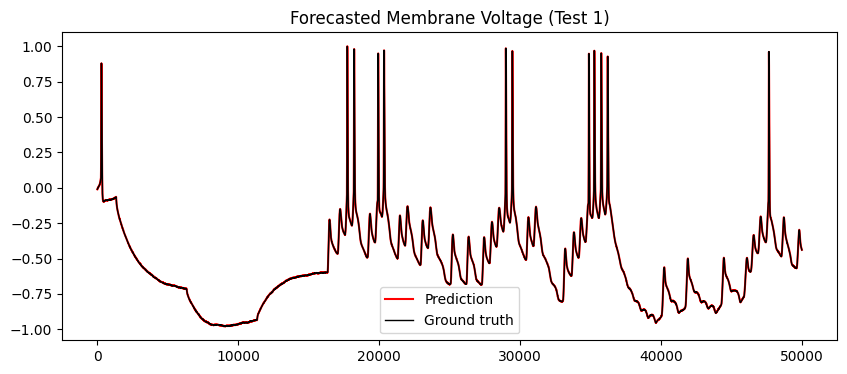

In [22]:
# Test 1:
# The order of magnitude for weights[0] has been set to -2, and the sign has been swapped.
# It was then changed to 00.
test = [-5.28868299e-00,  3.07653809e-03, -3.91220203e-01, -3.30213589e-03, 1.38909544e+00,
           2.32761984e-02,  2.95090733e-02, -5.00705628e-02, -5.46168002e-02,  2.35743251e-01,
           -7.21082797e-02, -3.10163759e-01, 2.58718185e-02,  9.93787925e-02,  7.07895897e-02]

nvar = NVAR(delay=2, strides = 3, order=2)
nvar.readout = np.array(test).reshape(1, -1)

y_pred = nvar.predict(X_test=x_test)

plt.figure(figsize=(10, 4))
plt.plot(y_pred, color="r", lw=1.5, label="Prediction")
plt.plot(y_test, color="k", lw=1.0, label="Ground truth")
plt.title(f"Forecasted Membrane Voltage (Test 2)")
plt.legend()

"""
Appears to have shifted the entire plot upwards. The fit is still good in that it describes the pattern well. Continuing to increase the order of magnitude rapidly shifts the predicted plot upwards, after reaching 1 they become separated by orders of hundreds. Interestingly, the sign of the weight appears to make no difference to the plot. The weight is simply a y-axis shift.
"""

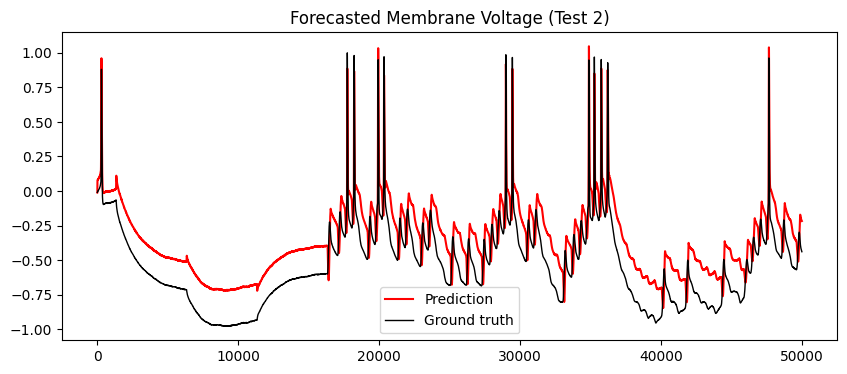

In [38]:
# Test 2:
# The order of magnitude for weights[1] has been set to -5. No discernible difference.
# It was then changed to 00. The plot rapidly shrinks in absolute scale and becomes tightly fit around zero. This has has less effect on some values over others.
# Increase OOM to +1. Previous effect exemplified.
# Set OOM back to -3 and swapped sign. No noticeable difference.
# Set OOM to 0, swapped sign. Plot suddenly flips on x-axis and some spikes become greatly exemplified. Becomes more drastic as 00M increases
# As OOM becomes -ve and sign is -ve, signal begins to shift in y and x values, jagged regions appear.
weights = [-3.28868299e-04,  -3.07653809e-01, -3.91220203e-01, -3.30213589e-03, 1.38909544e+00,
           2.32761984e-02,  2.95090733e-02, -5.00705628e-02, -5.46168002e-02,  2.35743251e-01,
           -7.21082797e-02, -3.10163759e-01, 2.58718185e-02,  9.93787925e-02,  7.07895897e-02]

nvar = NVAR(delay=2, strides = 3, order=2)
nvar.readout = np.array(weights).reshape(1, -1)

y_pred = nvar.predict(X_test=x_test)

plt.figure(figsize=(10, 4))
plt.plot(y_pred, color="r", lw=1.5, label="Prediction")
plt.plot(y_test, color="k", lw=1.0, label="Ground truth")
plt.title(f"Forecasted Membrane Voltage (Test 2)")
plt.legend()

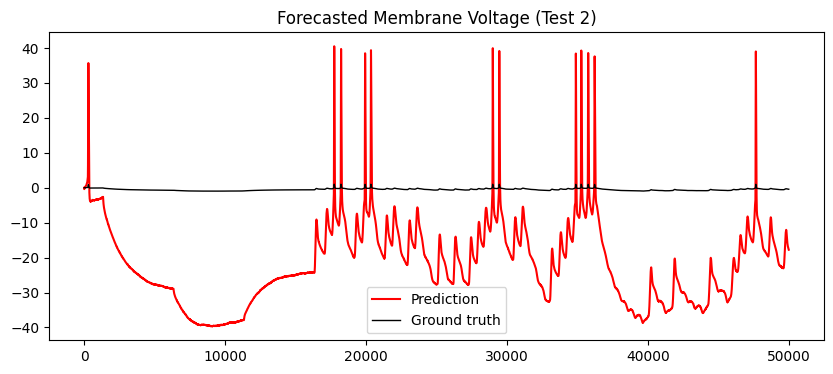

In [46]:
# Test 3: weights[2]
# Swapped sign. Scale of plot suddenly reduces, signal pattern otherwise unchanged.
# Swapped sign & OOM=-2. Scale approaches that of the measured signal. As OOM becomes more -ve it appears to very slowly approach the original size.
# Swapped sign & OOM=1. Scale increases largely. 
# OOM = +1. x-axis flip occurs, and scale is far beyond what it should be. 

weights = [-3.28868299e-04,  3.07653809e-03, 3.91220203e+01, -3.30213589e-03, 1.38909544e+00,
           2.32761984e-02,  2.95090733e-02, -5.00705628e-02, -5.46168002e-02,  2.35743251e-01,
           -7.21082797e-02, -3.10163759e-01, 2.58718185e-02,  9.93787925e-02,  7.07895897e-02]

nvar = NVAR(delay=2, strides = 3, order=2)
nvar.readout = np.array(weights).reshape(1, -1)

y_pred = nvar.predict(X_test=x_test)

plt.figure(figsize=(10, 4))
plt.plot(y_pred, color="r", lw=1.5, label="Prediction")
plt.plot(y_test, color="k", lw=1.0, label="Ground truth")
plt.title(f"Forecasted Membrane Voltage (Test 3)")
plt.legend()

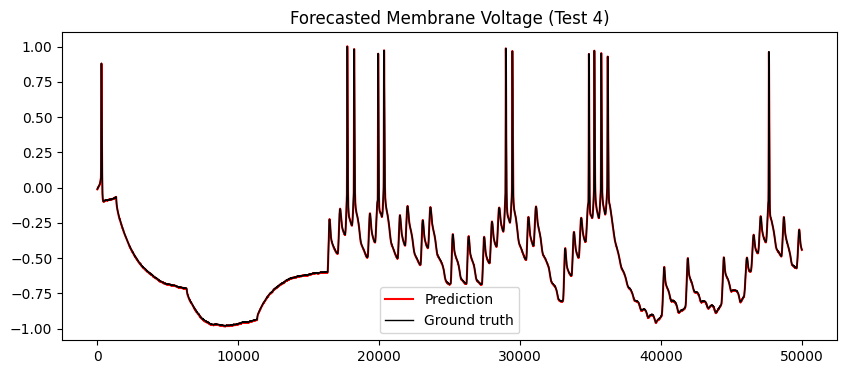

In [65]:
# Test 4: weights[3]
# +ve sign:
    # Same OOM: No change.
    # Reduced OOM: No change.
    # Zero OOM: Scale reduction.
    # Positive OOM: Curved regions become square, all spikes become taller and mean shifts to negative region.
# -ve sign:
    # Reduced OOM: No change for -5, no change for -15. Pattern continues.
    # Zero OOM: x-axis flip, spikes increase as shorter ones become larger, and the early regions' curvature becomes concave.
    #           overall trend in spiked regions swap orientation, inclines become declines etc.
    # Positive OOM: x-axis flip, early curvature becomes visually square and spikes once again become immensely large.
# Zeroed: No changes...

weights = [-3.28868299e-04,  3.07653809e-03, -3.91220203e-01, -3.30213589e+01, 1.38909544e+00,
           2.32761984e-02,  2.95090733e-02, -5.00705628e-02, -5.46168002e-02,  2.35743251e-01,
           -7.21082797e-02, -3.10163759e-01, 2.58718185e-02,  9.93787925e-02,  7.07895897e-02]

nvar = NVAR(delay=2, strides = 3, order=2)
nvar.readout = np.array(weights).reshape(1, -1)
y_pred = nvar.predict(X_test=x_test)
plt.figure(figsize=(10, 4))
plt.plot(y_pred, color="r", lw=1.5, label="Prediction")
plt.plot(y_test, color="k", lw=1.0, label="Ground truth")
plt.title(f"Forecasted Membrane Voltage (Test 4)")
plt.legend()

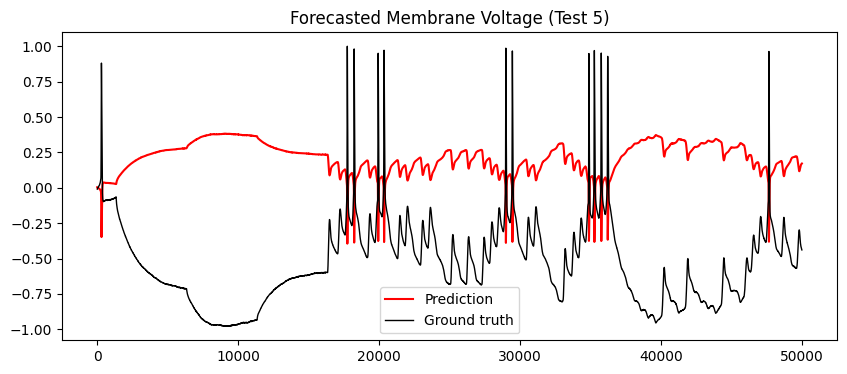

In [79]:
# Test 5: weights[4]
# Zeroed: Scale reduction and an x-axis flip.
# Positive sign:
    # Zero OOM: Literally unchanged.
    # -ve OOM: Scale reduction and x-axis flip. Effect doesn't appear to be emphasised by further reduction.
    # +ve OOM: At +1 the scale of all values increases with no flip. Pattern otherwise unchanged.
# Negative sign:
    # Zero OOM: Scale increase and x-axis flip.
    # -ve OOM: Scale reduction and an x-axis flip. Further reduction in OOM quickly delivers diminishing returns.
    # +ve OOM: Increased scale increase from zero OOM and an x-axis flip.

weights = [-3.28868299e-04,  3.07653809e-03, -3.91220203e-01, -3.30213589e-03, 1.38909544e-00,
           2.32761984e-02,  2.95090733e-02, -5.00705628e-02, -5.46168002e-02,  2.35743251e-01,
           -7.21082797e-02, -3.10163759e-01, 2.58718185e-02,  9.93787925e-02,  7.07895897e-02]

nvar = NVAR(delay=2, strides = 3, order=2)
nvar.readout = np.array(weights).reshape(1, -1)
y_pred = nvar.predict(X_test=x_test)
plt.figure(figsize=(10, 4))
plt.plot(y_pred, color="r", lw=1.5, label="Prediction")
plt.plot(y_test, color="k", lw=1.0, label="Ground truth")
plt.title(f"Forecasted Membrane Voltage (Test 5)")
plt.legend()

In [ ]:
# Test 6: wei
weights = [-3.28868299e-04,  3.07653809e-03, -3.91220203e-01, -3.30213589e-03, 1.38909544e-00,
           2.32761984e-02,  2.95090733e-02, -5.00705628e-02, -5.46168002e-02,  2.35743251e-01,
           -7.21082797e-02, -3.10163759e-01, 2.58718185e-02,  9.93787925e-02,  7.07895897e-02]

nvar = NVAR(delay=2, strides = 3, order=2)
nvar.readout = np.array(weights).reshape(1, -1)
y_pred = nvar.predict(X_test=x_test)
plt.figure(figsize=(10, 4))
plt.plot(y_pred, color="r", lw=1.5, label="Prediction")
plt.plot(y_test, color="k", lw=1.0, label="Ground truth")
plt.title(f"Forecasted Membrane Voltage (Test 5)")
plt.legend()